In [ ]:
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [17]:
def calculate_cluster_probability(num_clusters):
    cluster_prob = math.factorial(num_clusters)/(num_clusters**num_clusters)
    return cluster_prob

In [19]:
print(calculate_cluster_probability(100))

9.332621544394415e-43


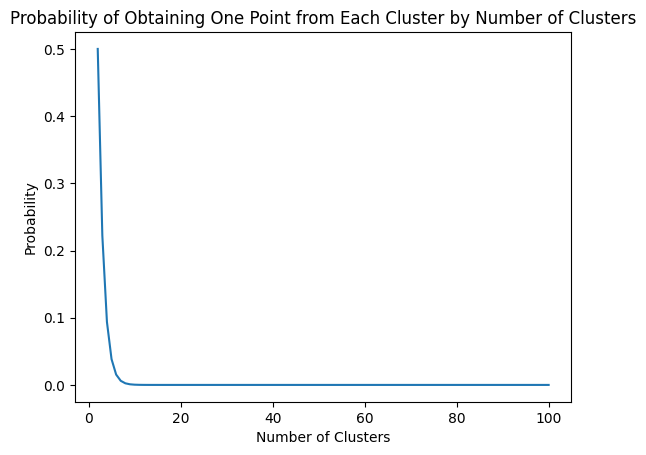

In [12]:
probs = [calculate_cluster_probability(i) for i in range(2, 101)]

plt.plot(range(2, 101), probs)
plt.xlabel("Number of Clusters")
plt.ylabel("Probability")
plt.title("Probability of Obtaining One Point from Each Cluster by Number of Clusters")
plt.show()

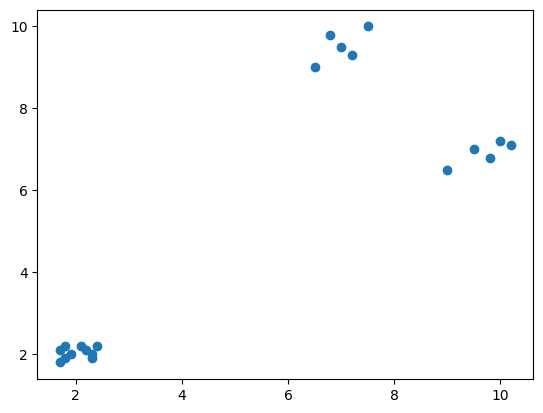

In [21]:
data = [
    # Dense Region - Cluster A
    [1.7, 2.1],
    [1.8, 1.9],
    [1.9, 2.0],
    [1.8, 2.2],
    [1.7, 1.8],
    
    # Dense Region - Cluster B
    [2.3, 2.0],
    [2.1, 2.2],
    [2.2, 2.1],
    [2.4, 2.2],
    [2.3, 1.9],
    
    # Sparse Region - Cluster C
    [6.5, 9.0],
    [7.0, 9.5],
    [7.5, 10.0],
    [6.8, 9.8],
    [7.2, 9.3],
    
    # Sparse Region - Cluster D
    [9.0, 6.5],
    [9.5, 7.0],
    [10.0, 7.2],
    [9.8, 6.8],
    [10.2, 7.1],
]
plt.plot(*zip(*data), 'o')
plt.show()

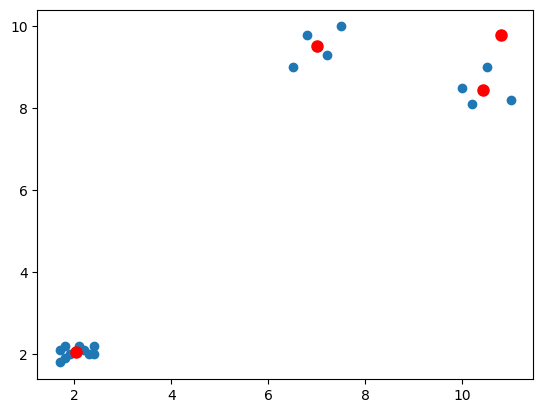

Dense: 1, Sparse: 3 → Total SSE: 3.1515


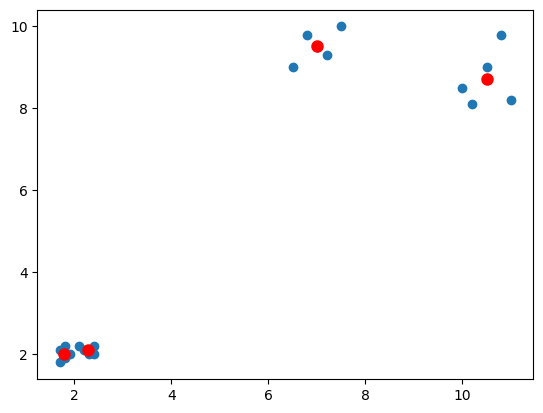

Dense: 2, Sparse: 2 → Total SSE: 4.0720


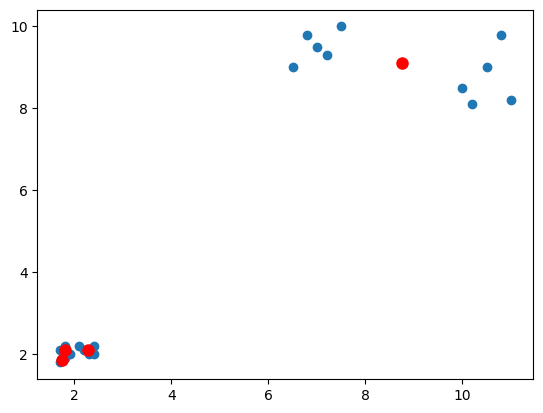

Dense: 3, Sparse: 1 → Total SSE: 36.2190


In [44]:
data = np.array([
    [1.7, 2.1], [1.8, 1.9], [1.9, 2.0], [1.8, 2.2], [1.7, 1.8],  # Dense A
    [2.3, 2.0], [2.1, 2.2], [2.2, 2.1], [2.4, 2.2], [2.4, 2.0],  # Dense B
    [6.5, 9.0], [7.0, 9.5], [7.5, 10.0], [6.8, 9.8], [7.2, 9.3], # Sparse C
    [10.0, 8.5], [10.5, 9.0], [11.0, 8.2], [10.8, 9.8], [10.2, 8.1] # Sparse D
])

# Split into regions (first 10 dense, last 10 sparse)
dense = data[:10]
sparse = data[10:]

# def compute_total_mse(dense_k, sparse_k):
#     dense_kmeans = KMeans(n_clusters=dense_k, n_init='auto', random_state=0).fit(dense)
#     sparse_kmeans = KMeans(n_clusters=sparse_k, n_init='auto', random_state=0).fit(sparse)
    
#     dense_error = np.sum((dense - dense_kmeans.cluster_centers_[dense_kmeans.labels_])**2)
#     sparse_error = np.sum((sparse - sparse_kmeans.cluster_centers_[sparse_kmeans.labels_])**2)
    
#     total_error = dense_error + sparse_error
#     return total_error

def compute_total_sse(dense_k, sparse_k):
    dense_kmeans = KMeans(n_clusters=dense_k, n_init='auto', random_state=0).fit(dense)
    sparse_kmeans = KMeans(n_clusters=sparse_k, n_init='auto', random_state=0).fit(sparse)
    
    # SSE is the sum of squared distances from points to their centroids
    dense_sse = np.sum((dense - dense_kmeans.cluster_centers_[dense_kmeans.labels_])**2)
    sparse_sse = np.sum((sparse - sparse_kmeans.cluster_centers_[sparse_kmeans.labels_])**2)
    
    total_sse = dense_sse + sparse_sse
    # print(dense_kmeans.cluster_centers_)
    # print(sparse_kmeans.cluster_centers_)

    # Combine the cluster centers for visualization
    cluster_centers = np.vstack((dense_kmeans.cluster_centers_, sparse_kmeans.cluster_centers_))
    return total_sse, cluster_centers

# plt.plot(*zip(*data), 'o')
# plt.show()

# Try different allocations for 4 total centroids
for dense_k in range(1, 4):
    sparse_k = 4 - dense_k
    # mse = compute_total_sse(dense_k, sparse_k)
    sse, cluster_centers = compute_total_sse(dense_k, sparse_k)
    # print(cluster_centers)
    plt.plot(*zip(*data), 'o')
    plt.plot(*zip(*cluster_centers), 'ro', markersize=8)
    plt.show()
    print(f"Dense: {dense_k}, Sparse: {sparse_k} → Total SSE: {sse:.4f}")


In [55]:
# 2**21
# 8388608 + 2097152
# 134217728/10485760
k = 1000
(1 - (1 - 1/k) ** (2*k))**k

8.236039293409639e-64

In [ ]:
# data = np.array([
#     [1.7, 2.1], [1.8, 1.9], [1.9, 2.0], [1.8, 2.2], [1.7, 1.8],  # Dense A
#     [2.3, 2.0], [2.1, 2.2], [2.2, 2.1], [2.4, 2.2], [2.4, 2.0],  # Dense B
#     [6.5, 9.0], [7.0, 9.5], [7.5, 10.0], [6.8, 9.8], [7.2, 9.3], # Sparse C
#     [10.0, 8.5], [10.5, 9.0], [11.0, 8.2], [10.8, 9.8], [10.2, 8.1] # Sparse D
# ])

# # Split into regions (first 10 dense, last 10 sparse)
# dense = data[:10]
# sparse = data[10:]

# # def compute_total_mse(dense_k, sparse_k):
# #     dense_kmeans = KMeans(n_clusters=dense_k, n_init='auto', random_state=0).fit(dense)
# #     sparse_kmeans = KMeans(n_clusters=sparse_k, n_init='auto', random_state=0).fit(sparse)
    
# #     dense_error = np.sum((dense - dense_kmeans.cluster_centers_[dense_kmeans.labels_])**2)
# #     sparse_error = np.sum((sparse - sparse_kmeans.cluster_centers_[sparse_kmeans.labels_])**2)
    
# #     total_error = dense_error + sparse_error
# #     return total_error

# def compute_total_sse(data, k):
#     kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0).fit(data)
    
#     # SSE is the sum of squared distances from points to their centroids
#     total_sse = np.sum((data - kmeans.cluster_centers_[kmeans.labels_])**2)
#     cluster_centers = kmeans.cluster_centers_
#     return total_sse, cluster_centers

# # plt.plot(*zip(*data), 'o')
# # Plot cluster centers
# # sse, cluster_centers = compute_total_sse(data, 4)
# # plt.plot(*zip(*cluster_centers), 'ro', markersize=8)
# # plt.show()

# # Try different allocations for 4 total centroids
# for dense_k in range(1, 4):
#     sparse_k = 4 - dense_k
#     # mse = compute_total_sse(data, dense_k)#, sparse_k)
#     sse, cluster_centers = compute_total_sse(data, dense_k)
#     plt.plot(*zip(*data), 'o')
#     plt.plot(*zip(*cluster_centers), 'ro', markersize=8)
#     plt.show()
#     print(f"Dense: {dense_k}, Sparse: {sparse_k} → Total SSE: {sse:.4f}")
